<ipython-input-2-8760a640cfe7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


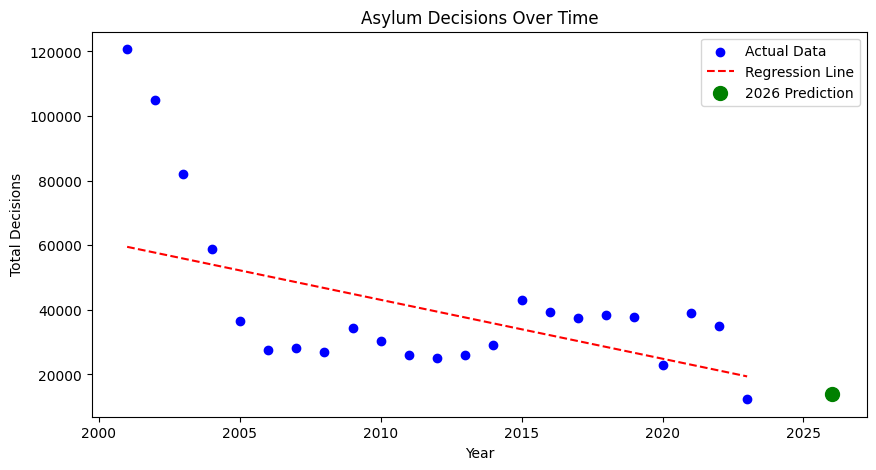

Mean Absolute Error (MAE): 20305.4879180152
Root Mean Squared Error (RMSE): 28865.898371415373
Predicted Decisions for 2026: 13918.149406687822


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "asylum-applications-datasets-mar-2023.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data - Asy_D02", skiprows=1)

df = df.iloc[1:].reset_index(drop=True)

#I converted the year column to numeric and then dropped missing values in the decisions column
df = df.dropna(subset=["Year", "Decisions"])
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

#This aggregates the date by year
df_yearly = df.groupby("Year")["Decisions"].sum().reset_index()

#I set the variables for x and y for regression
X = df_yearly[["Year"]]
y = df_yearly["Decisions"]

#I split this into training and testing sets (80/20) and set this ramdom state to 42 to ensure consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#This trains the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#This makes predictions on the test data
y_pred = model.predict(X_test)

#This shows creates the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#This code makes the prediction for the next year
next_year = np.array([[2026]])
next_year_prediction = model.predict(next_year)[0]

#This plots the results into a graph
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linestyle='dashed', label="Regression Line")
plt.scatter(2026, next_year_prediction, color='green', marker='o', s=100, label="2026 Prediction")
plt.xlabel("Year")
plt.ylabel("Total Decisions")
plt.title("Asylum Decisions Over Time")
plt.legend()
plt.show()

#This prints the evaluation metrics and prediction
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Predicted Decisions for 2026: {next_year_prediction}")